Step 1: Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load the Dataset

In [ ]:
data = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


Step 3: Data Preprocessing — Full Code

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')  # replace with actual file name


Step- 3.1 Handle Missing Values & Duplicates

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Confirm again
print("After cleaning, missing values:\n", df.isnull().sum())


Missing values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64
After cleaning, missing values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


Step -3.2 Convert 'Order Date' to datetime format

In [ ]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check if it converted properly
print(df['Order Date'].dtypes)


datetime64[ns]


Step - 3.3 Extract Day, Month, and Year

In [ ]:
# Extract day, month number, month name, and year
df['Order Day'] = df['Order Date'].dt.day
df['Month No'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

# Optional: check the new columns
df[['Order Date', 'Order Day', 'Month No', 'Month Name', 'Year']].head()


,Order Date,Order Day,Month No,Month Name,Year
0,2017-11-08,8.0,11.0,November,2017.0
1,2017-11-08,8.0,11.0,November,2017.0
2,2017-06-12,12.0,6.0,June,2017.0
3,2016-10-11,11.0,10.0,October,2016.0
4,2016-10-11,11.0,10.0,October,2016.0


Step - 3.4 Label Encode Categorical Columns


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month Name']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the changes
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Month No,Month Name,Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,11.0,9,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,11.0,9,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,6.0,6,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10.0,10,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10.0,10,2016.0


Step 4: Exploratory Data Analysis (EDA)


4.1 Sales Distribution by Category

/tmp/ipython-input-13-1591418562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')


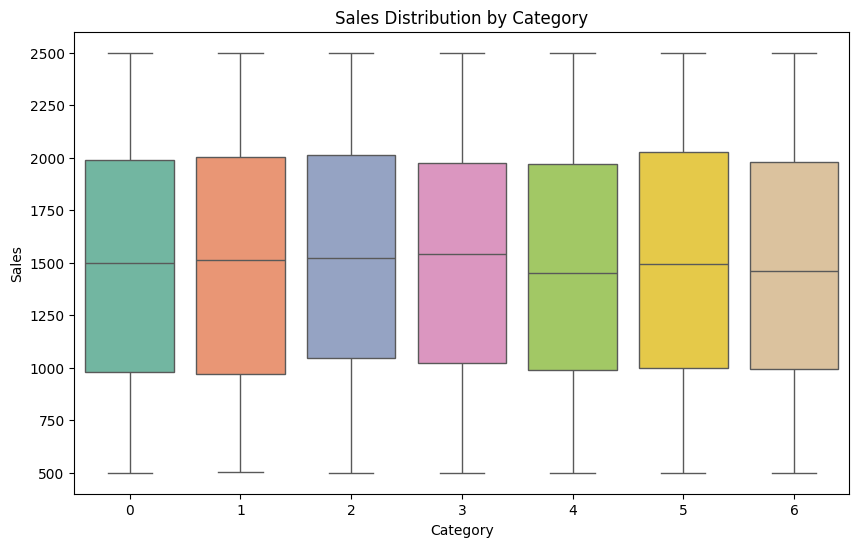

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Shows how sales vary within each product category using a boxplot.


 4.2 Sales Trends Over Time

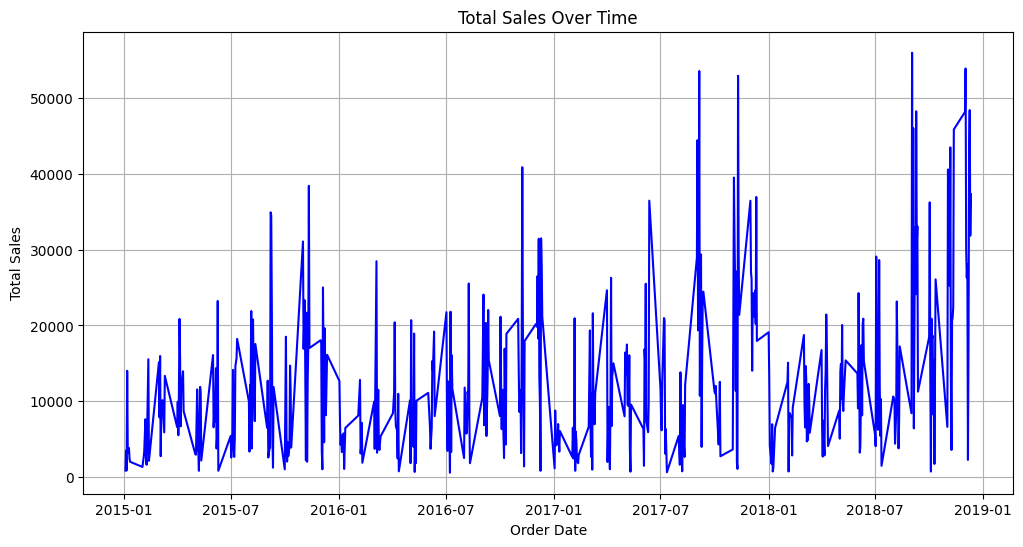

In [ ]:
# Group by Order Date and sum Sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Displays how total sales changed day by day.


Step 4.3 Correlation Heatmap

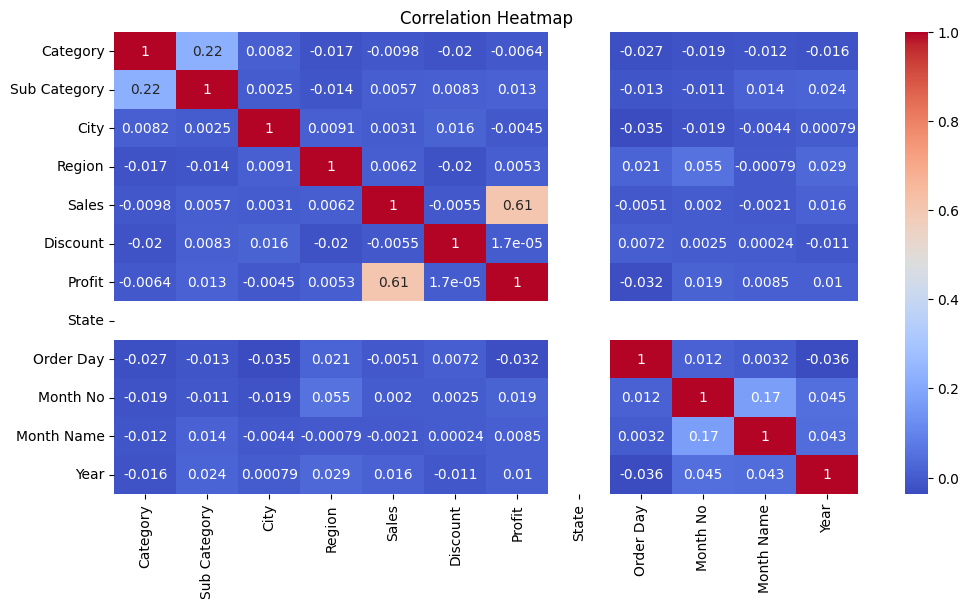

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Step-4.4 Top-Performing Cities

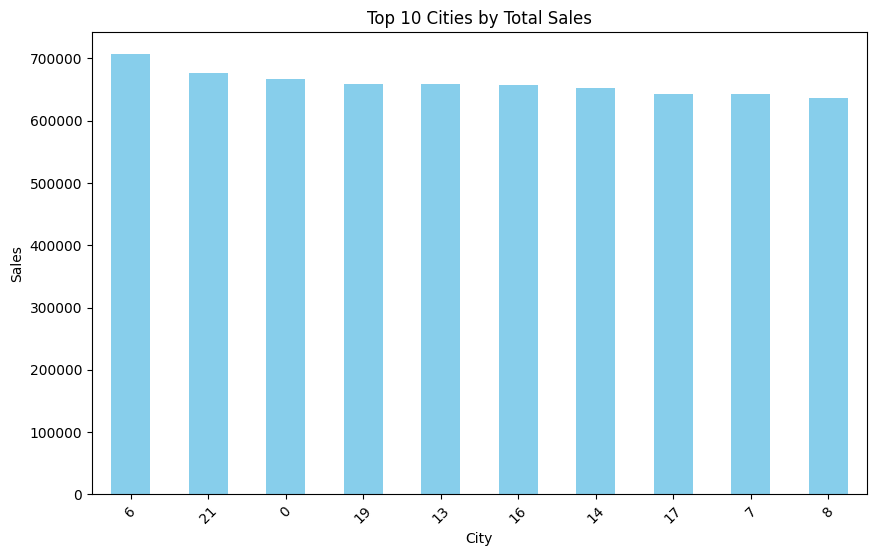

In [ ]:
# Total sales per city
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


Step - 4.5 Top-Performing Years

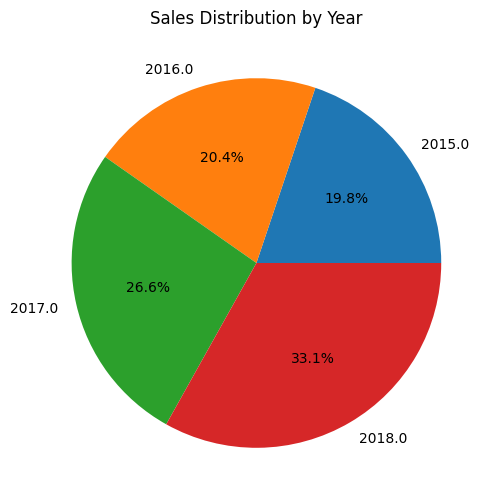

In [ ]:
yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8, 6))
yearly_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Year')
plt.ylabel('')  # Remove y-axis label
plt.show()


Step -5  Feature Selection

In [ ]:
#  Step 5.1: Define Features and Target
# 'Sales' is the target — we want to predict it
# All other columns are features (inputs)

features = df.drop(columns=['Sales'], errors='ignore')  # drop 'Sales' from input
target = df['Sales']  # keep 'Sales' as output


In [ ]:
#  Step 5.2: Split the data into Train and Test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)


In [ ]:
# Step 5.3: Scale the features for better performance
from sklearn.preprocessing import StandardScaler

# Filter out only numeric columns from features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

#  Now i  apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Step -6 Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train model using training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)


Step -7 Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate how well the model is performing
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(" Model Evaluation Results:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


 Model Evaluation Results:
Mean Squared Error: 211792.50806483312
R² Score: 0.3668852511035946


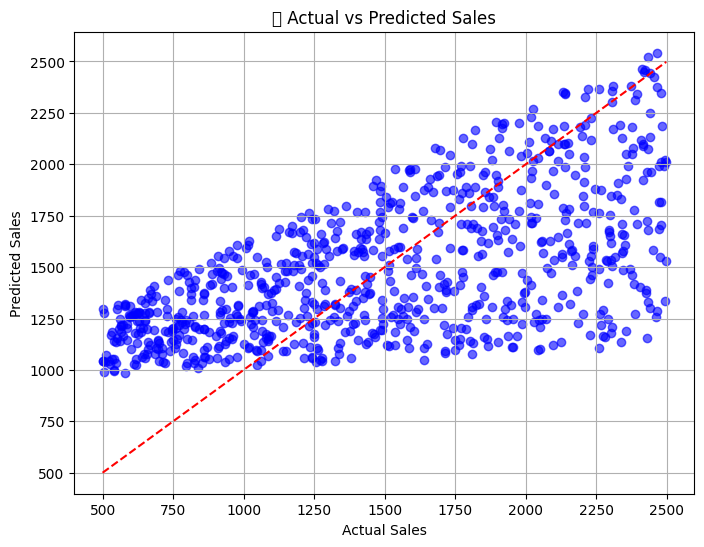

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('📈 Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()
